# Plot time-height series of radar reflectivity

- preliminary data from W-band cloud radar

In [137]:
import matplotlib.pyplot as plt
from matplotlib import rc, colors, ticker
import matplotlib.dates as mdates
import numpy as np
import xarray as xr
import pandas as pd
from datetime import datetime, timedelta
import cftime
import os
import glob
import cmocean

In [77]:
start_time = np.datetime64('2024-08-16T10:10:00')
end_time = np.datetime64('2024-09-23T22:50:00')

#Make 10-minute time array
times_10min = np.arange(start_time, end_time, np.timedelta64(10, 'm'))

#Make days array
days = np.arange(start_time, end_time, np.timedelta64(1, 'D'))
#convert days to YYYY-MM-DD format
days = [pd.to_datetime(str(day)).strftime('%Y-%m-%d') for day in days]
days

['2024-08-16',
 '2024-08-17',
 '2024-08-18',
 '2024-08-19',
 '2024-08-20',
 '2024-08-21',
 '2024-08-22',
 '2024-08-23',
 '2024-08-24',
 '2024-08-25',
 '2024-08-26',
 '2024-08-27',
 '2024-08-28',
 '2024-08-29',
 '2024-08-30',
 '2024-08-31',
 '2024-09-01',
 '2024-09-02',
 '2024-09-03',
 '2024-09-04',
 '2024-09-05',
 '2024-09-06',
 '2024-09-07',
 '2024-09-08',
 '2024-09-09',
 '2024-09-10',
 '2024-09-11',
 '2024-09-12',
 '2024-09-13',
 '2024-09-14',
 '2024-09-15',
 '2024-09-16',
 '2024-09-17',
 '2024-09-18',
 '2024-09-19',
 '2024-09-20',
 '2024-09-21',
 '2024-09-22',
 '2024-09-23']

Read in data

In [78]:
#Read in data and interpolate to 10-minutes 

#filepaths = glob.glob("/Volumes/piccolo_data/M203/CloudRadar/preliminary_W-band_radar_data/bowtie_preliminary_interp_cloudradar_2024-08-1*")
#wband = xr.open_mfdataset(filepaths)

#wband = xr.open_dataset("/Volumes/piccolo_data/M203/CloudRadar/preliminary_W-band_radar_data/bowtie_preliminary_interp_cloudradar_2024-09-23T00_v0.1.nc")

#Open data each day
for dd in days:
    if dd == '2024-08-16':
        filename = "/Volumes/piccolo_data/M203/CloudRadar/preliminary_W-band_radar_data/bowtie_preliminary_interp_cloudradar_" + dd + 'T10_v0.1.nc'
    else:
        filename = "/Volumes/piccolo_data/M203/CloudRadar/preliminary_W-band_radar_data/bowtie_preliminary_interp_cloudradar_" + dd + 'T00_v0.1.nc'
    wband_day = xr.open_dataset(filename)

    #Interpolate to 10-minute time array
    times_day_10min = np.arange(wband_day.time.values[0], wband_day.time.values[-1], np.timedelta64(10, 'm'))
    wband_day_interp = wband_day.interp(time=times_day_10min)

    #Concatenate to full dataset
    if dd == days[0]:
        wband_10min = wband_day_interp
    else:
        wband_10min = xr.concat([wband_10min, wband_day_interp], dim='time')


In [79]:
wband_10min

<xarray.Dataset> Size: 125MB
Dimensions:           (time: 5546, range_original: 1227, range_interp: 393,
                       range: 393)
Coordinates:
  * range_original    (range_original) float32 5kB 104.3 119.3 ... 1.197e+04
  * range_interp      (range_interp) float32 2kB 104.3 119.3 ... 1.196e+04
  * range             (range) float32 2kB 104.3 119.3 ... 1.192e+04 1.196e+04
  * time              (time) datetime64[ns] 44kB 2024-08-16T10:00:06.260000 ....
Data variables:
    altitude          (time) float32 22kB 16.0 16.0 16.0 16.0 ... 16.0 16.0 16.0
    latitude          (time) float32 22kB 13.0 13.0 13.0 13.0 ... 13.0 13.0 13.0
    longitude         (time) float32 22kB -57.7 -57.7 -57.7 ... -57.7 -57.7
    Ze_original       (time, range_original) float64 54MB nan nan ... nan nan
    var_range         (time, range_original) float32 27MB 104.3 119.3 ... nan
    Ze_interpolated   (time, range_interp) float64 17MB nan nan nan ... nan nan
    range_distance    (time, range) float32 9MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    range_distance_2  (time, range) float32 9MB nan nan nan nan ... nan nan nan
    range_distance_3  (time, range) float32 9MB nan nan nan nan ... nan nan nan
Attributes: (12/20)
    Conventions:    CF-1.8
    title:          LIMRAD94 Doppler Cloud Radar, preliminary file, Reflectiv...
    campaign_id:    BOWTIE
    platform_id:    Meteor
    instrument_id:  LIMRAD94
    version_id:     v0.1-preliminary
    ...             ...
    description:    Concatenated data files of LIMRAD 94GHz - FMCW Radar Refl...
    history:        Created Fri Dec 13 14:54:59 2024
    _FillValue:     -999.0
    day:            16
    month:          8
    year:           2024

/var/folders/ym/zbw7d2hd013cdrqzhhl0z7580000gn/T/ipykernel_31519/3318075099.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/var/folders/ym/zbw7d2hd013cdrqzhhl0z7580000gn/T/ipykernel_31519/3318075099.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


[Text(0, 0.0, '0'),
 Text(0, 2.0, '2'),
 Text(0, 4.0, '4'),
 Text(0, 6.0, '6'),
 Text(0, 8.0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 12.0, '12'),
 Text(0, 14.0, '14')]

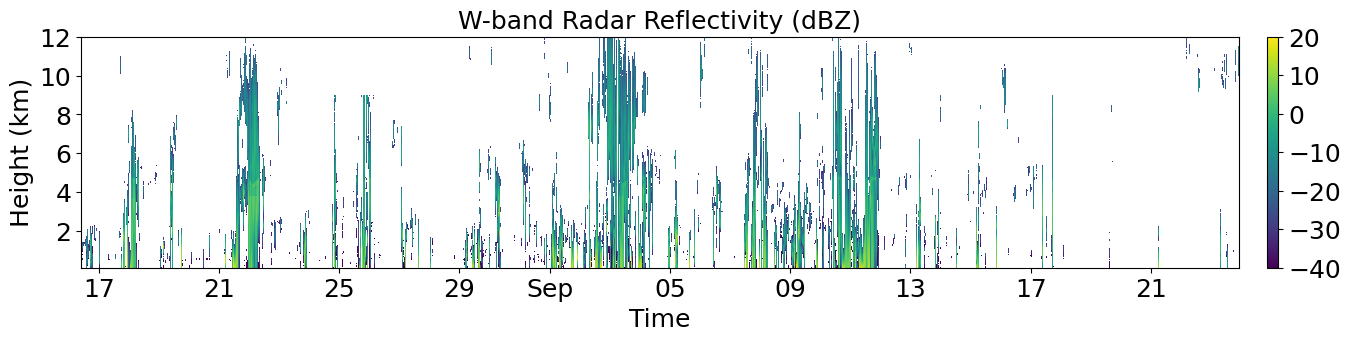

In [106]:
#Plot for whole campaign (10 minute data)

fig,ax = plt.subplots(figsize=(18,3))

height = wband_10min.range_interp.values + wband_10min.altitude.values[0] #height above sea-level = height of instrument + range from antenna
plt.pcolormesh(wband_10min.time.values,height/1000,wband_10min.Ze_interpolated.transpose('range_interp','time').values, cmap='viridis',vmin=-40,vmax=20,shading='nearest')

cbar=plt.colorbar(location='right',orientation='vertical', pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(np.linspace(-40,20,7))

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.set_title('W-band Radar Reflectivity (dBZ)',fontsize=18)
ax.set_ylabel('Height (km)', fontsize=18)
ax.set_xlabel('Time',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

In [96]:
# Read in all data for a subset of days

time1 = np.datetime64('2024-09-01T00:00:00')
time2 = np.datetime64('2024-09-04T00:00:00')

#Make days array
days = np.arange(time1, time2, np.timedelta64(1, 'D'))
#convert days to YYYY-MM-DD format
days = [pd.to_datetime(str(day)).strftime('%Y-%m-%d') for day in days]

#Open data each day
for dd in days:
    if dd == '2024-08-16':
        filename = "/Volumes/piccolo_data/M203/CloudRadar/preliminary_W-band_radar_data/bowtie_preliminary_interp_cloudradar_" + dd + 'T10_v0.1.nc'
    else:
        filename = "/Volumes/piccolo_data/M203/CloudRadar/preliminary_W-band_radar_data/bowtie_preliminary_interp_cloudradar_" + dd + 'T00_v0.1.nc'
    wband_day = xr.open_dataset(filename)

    #Concatenate to full dataset
    if dd == days[0]:
        wband_subset = wband_day
    else:
        wband_subset = xr.concat([wband_subset, wband_day], dim='time')
 


Text(0.5, 0, 'Time')

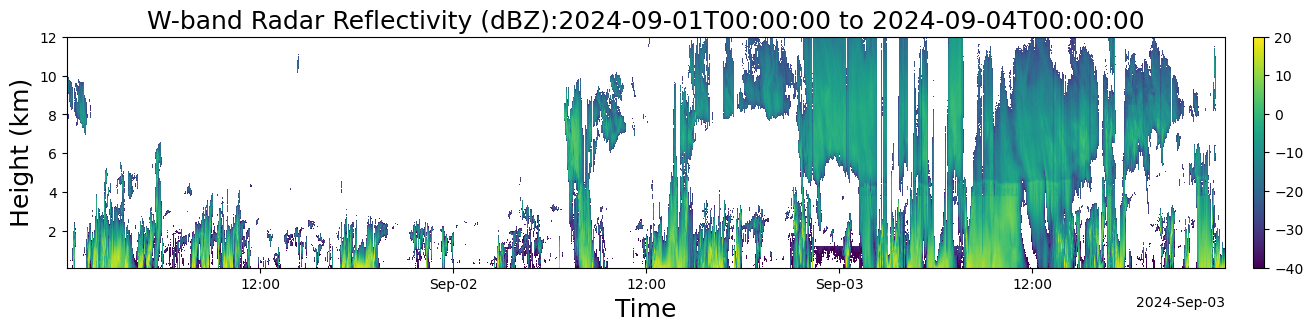

In [100]:
# plot 
 
fig,ax = plt.subplots(figsize=(18,3))

height = wband_subset.range_interp.values + wband_subset.altitude.values[0] #height above sea-level = height of instrument + range from antenna
plt.pcolormesh(wband_subset.time.values,height/1000,wband_subset.Ze_interpolated.transpose('range_interp','time').values, cmap='viridis',vmin=-40,vmax=20,shading='nearest')

cbar=plt.colorbar(location='right',orientation='vertical', pad=0.02)


ax.set_title('W-band Radar Reflectivity (dBZ):' + str(time1) + ' to ' + str(time2),fontsize=18)          
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.set_ylabel('Height (km)', fontsize=18)
ax.set_xlabel('Time',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

# CFAD of radar reflectivity

In [150]:
def compute_cfad(invar, bins):
    nz = invar.shape[1]
    nbin = len(bins)
    hist_density=np.zeros((nbin-1,nz))
    for iz in range(nz):
        count, bin_edges = np.histogram(invar[:,iz], bins=bins, density=True)
        hist_density[:,iz] = count
    return hist_density, bin_edges

In [175]:
# Compute CFAD

nbin = 60
fmin = -40
fmax = 21
bins = np.linspace(fmin,fmax,nbin+1)

cfad_density, bin_edges = compute_cfad(wband_10min.Ze_interpolated.values, bins)

/var/folders/ym/zbw7d2hd013cdrqzhhl0z7580000gn/T/ipykernel_31519/856017221.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/var/folders/ym/zbw7d2hd013cdrqzhhl0z7580000gn/T/ipykernel_31519/856017221.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


[Text(0, 0.0, '0'),
 Text(0, 2.0, '2'),
 Text(0, 4.0, '4'),
 Text(0, 6.0, '6'),
 Text(0, 8.0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 12.0, '12'),
 Text(0, 14.0, '14')]

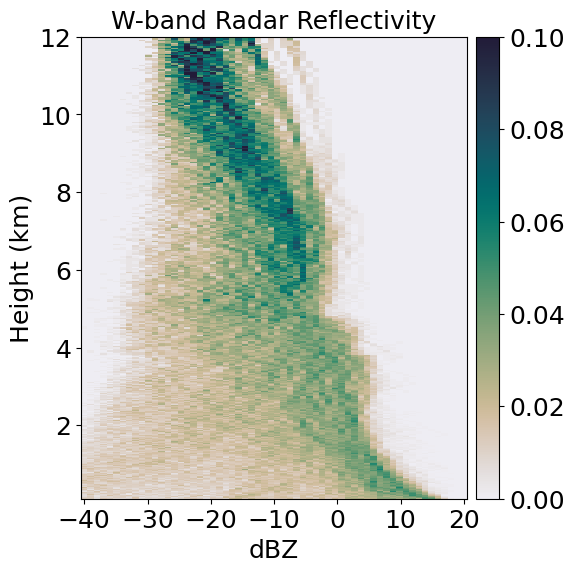

In [176]:
# Plot CFAD

fig,ax = plt.subplots(figsize=(6,6))

cfad = ax.pcolormesh(bins[:-1],height/1000,cfad_density.transpose(),cmap=cmocean.cm.rain,norm=colors.Normalize(vmin=0,vmax=0.1),shading='nearest')  

cbar=plt.colorbar(cfad,location='right',orientation='vertical', pad=0.02)
cbar.ax.tick_params(labelsize=18)

ax.set_title('W-band Radar Reflectivity',fontsize=18)
ax.set_ylabel('Height (km)', fontsize=18)
ax.set_xlabel('dBZ',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)